# Importing Packages

In [39]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer, assemble, transpile
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [40]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

In [67]:
qreg = QuantumRegister(2) 
creg = ClassicalRegister(1) 

qc = QuantumCircuit(qreg, creg)

# Initialising Qubits

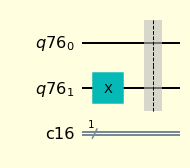

In [68]:
qc.x(1) # Applying X gate on qubit 2 to get |1>

qc.barrier()
qc.draw(output='mpl', style=style) 

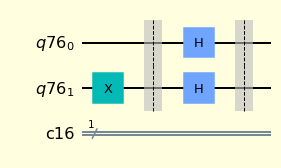

In [69]:
# Applying Hadamard Gate
for qubit in range(2):
    qc.h(qubit)

qc.barrier()
qc.draw(output='mpl', style=style) 

# Oracle
If the function is constant, then it can either take $f(x)=1$  or $f(x)=0$ for all values of $x$.
1. If the function takes $0$ for all values of $x$, then $I$ gate is applied on Qubit 2.
2. If the function takes $1$ for all values of $x$, then $X$ gate is applied on Qubit 2.

If the function is balanced, then we apply $CNOT$ gate to each qubit in the input register as control and the ancilla qubit as target.

# Apply hadamard gate to input register and measure the input register. 
For a constant function, the probability amplitude for $|0>$ will be 1.

For a balanced function, the probability amplitude for $|1>$ will be 1.

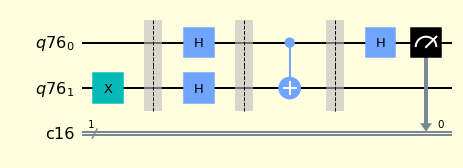

In [70]:
# Balanced Oracle
qc.cx(0,1)
qc.barrier()
for qubit in range(1):
    qc.h(qubit)
qc.measure(0,0)
qc.draw(output='mpl', style=style) 

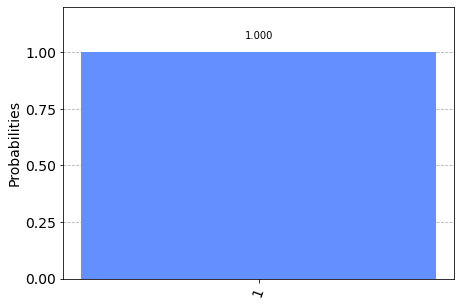

In [71]:
transpiled_dj_circuit = transpile(qc, backend)
qobj = assemble(transpiled_dj_circuit)
results = backend.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [74]:
## Re-initialising
qreg = QuantumRegister(2) 
creg = ClassicalRegister(1) 

qc = QuantumCircuit(qreg, creg)

qc.x(1) # Applying X gate on qubit 2 to get |1>

qc.barrier()
# qc.draw(output='mpl', style=style) 

# Applying Hadamard Gate
for qubit in range(2):
    qc.h(qubit)

qc.barrier()

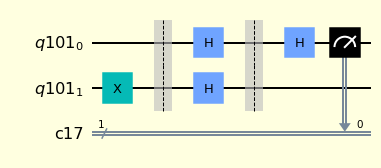

In [75]:
# Constant Oracle
if qc[1]==1:
    qc.x(1)

for qubit in range(1):
    qc.h(qubit)
qc.measure(0,0)
qc.draw(output='mpl', style=style) 


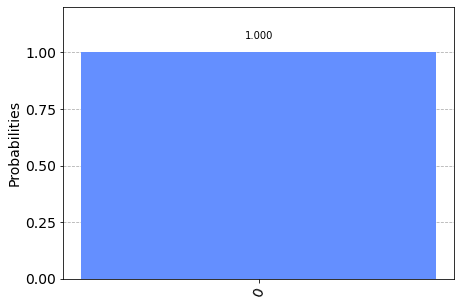

In [76]:
transpiled_dj_circuit = transpile(qc, backend)
qobj = assemble(transpiled_dj_circuit)
results = backend.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# References
[Deutsch's Algorithm by Full Stack Quantum Computation](https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/#:~:text=If%20only%20one%20evaluation%20is,a%20quantum%20oracle%20for%20f.)

[Deutsch-Joza's Algorithm by Qiskit](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html#3.-Creating-Quantum-Oracles--)